In [92]:
import numpy as np 

In [93]:
import pandas as pd
import matplotlib.pyplot as plt


In [94]:
file_path = r"C:\Users\dipak\OneDrive\Desktop\Journey_AI\IBM AI ENgineer\gen_AI\data_analysis\3_module\laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(file_path)
# df = pd.DataFrame(df, index="Unnamed:")
df = pd.DataFrame(df)

In [95]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [97]:
missing_data = df.isnull()

In [98]:
missing_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [99]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64
Manufacturer
Manufacturer
False    238
Name: count, dtype: int64
Category
Category
False    238
Name: count, dtype: int64
Screen
Screen
False    238
Name: count, dtype: int64
GPU
GPU
False    238
Name: count, dtype: int64
OS
OS
False    238
Name: count, dtype: int64
CPU_core
CPU_core
False    238
Name: count, dtype: int64
Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64
CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64
RAM_GB
RAM_GB
False    238
Name: count, dtype: int64
Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64
Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64
Price
Price
False    238
Name: count, dtype: int64


In [100]:
weight_mean = df["Weight_kg"].astype("float").mean(axis=0)

In [101]:
weight_mean

1.8622317596566522

In [102]:
df["Weight_kg"].replace(np.nan, weight_mean, inplace=True)

C:\Users\dipak\AppData\Local\Temp\ipykernel_5824\873045613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].replace(np.nan, weight_mean, inplace=True)


In [103]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [104]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [105]:
frequent_screen_size = df["Screen_Size_cm"].value_counts().idxmax()

In [106]:
frequent_screen_size

39.624

In [107]:
df["Screen_Size_cm"].replace(np.nan, frequent_screen_size, inplace=True)

C:\Users\dipak\AppData\Local\Temp\ipykernel_5824\2952914632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, frequent_screen_size, inplace=True)


In [108]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_cm', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [109]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

In [110]:
df["New_weights"] = df["Weight_kg"] * 2.205
df["New_screen_size"] = df["Screen_Size_cm"]/2.54

df.rename(columns={"Weight_kg":"New_weights",
                   "Screen_Size_cm":"New_screen_size"}, inplace=True)

In [111]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'New_screen_size', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'New_weights', 'Price', 'New_weights', 'New_screen_size'],
      dtype='object')

In [114]:
df = df.loc[:, ~df.columns.duplicated()]
# This line of code is direct copy from chat gpt

In [115]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'New_screen_size', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'New_weights', 'Price'],
      dtype='object')

In [116]:
df["CPU_frequency"] = df["CPU_frequency"]/df["CPU_frequency"].max()

In [119]:
bins = np.linspace(min(df["Price"]), max(df["Price"]),4)
group_name = ["Low","Medium","High"]


In [ ]:
df["Binned_price"] = pd.cut(df["Price"],bins,labels=group_name,include_lowest=True)

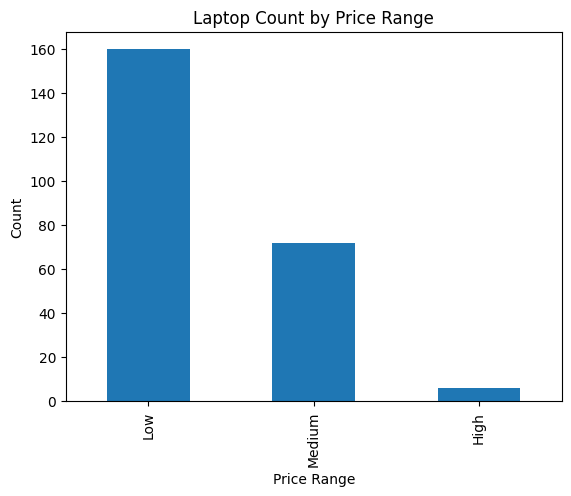

In [127]:
df["Binned_price"].value_counts().plot(kind="bar")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Laptop Count by Price Range")
plt.show()

In [135]:
ind_dummy_variable_one = pd.get_dummies(df["Screen"])

In [ ]:
["Screen-IPS_panel","Screen-Full_HD"]

'Screen-Full_HD'

In [136]:
ind_dummy_variable_one.columns

Index(['Full HD', 'IPS Panel'], dtype='object')

In [138]:
ind_dummy_variable_one.rename(columns={
    "Full HD": "Screen-Full_HD",
    "IPS Panel":"Screen-IPS_panel"
}, inplace=True)

In [143]:
df.drop("Screen", axis=1, inplace=True)

In [144]:
df = pd.concat([df, ind_dummy_variable_one],axis=1)

In [145]:
df.columns

Index(['Manufacturer', 'Category', 'GPU', 'OS', 'CPU_core', 'New_screen_size',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'New_weights', 'Price',
       'Binned_price', 'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [146]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,New_screen_size,CPU_frequency,RAM_GB,Storage_GB_SSD,New_weights,Price,Binned_price,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,35.560,0.551724,8,256,1.60,978,Low,False,True
1,Dell,3,1,1,3,39.624,0.689655,4,256,2.20,634,Low,True,False
2,Dell,3,1,1,7,39.624,0.931034,8,256,2.20,946,Low,True,False
3,Dell,4,2,1,5,33.782,0.551724,8,128,1.22,1244,Low,False,True
4,HP,4,2,1,7,39.624,0.620690,8,256,1.91,837,Low,True,False
